# Models

## Neural Network - Feedforward

I'm just loading the results and plotting them in this section.

In [105]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Remarka\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay

Let's load data

In [107]:
epoch_stats = pd.read_csv('nn_results/epoch_statistics.csv')
results_df = pd.read_csv('nn_results/results.csv')

Applying formal style:

In [108]:
plt.style.use('default')

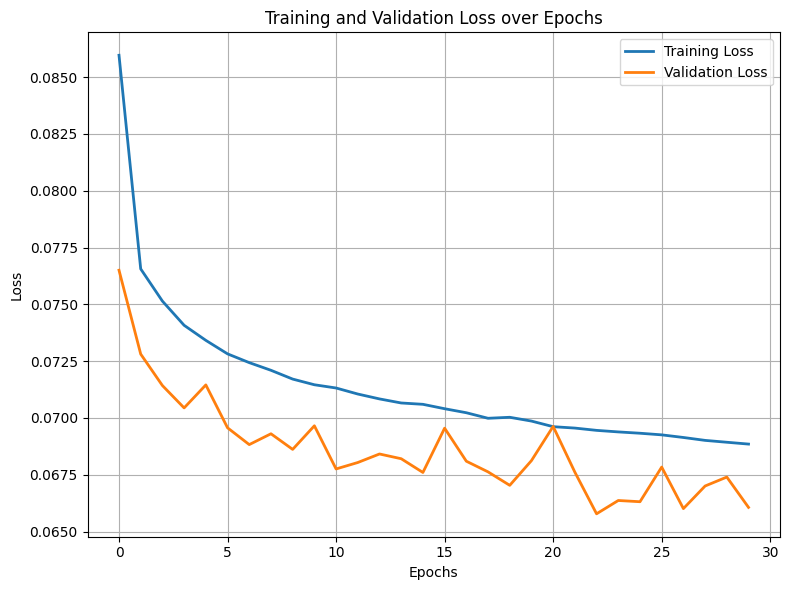

In [109]:
# Plot epoch statistics
plt.figure(figsize=(8, 6))
plt.plot(epoch_stats['loss'], label='Training Loss', linewidth=2)  # Adjust the thickness here
plt.plot(epoch_stats['val_loss'], label='Validation Loss', linewidth=2)  # Adjust the thickness here
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.grid(True) 
plt.legend()
plt.tight_layout()


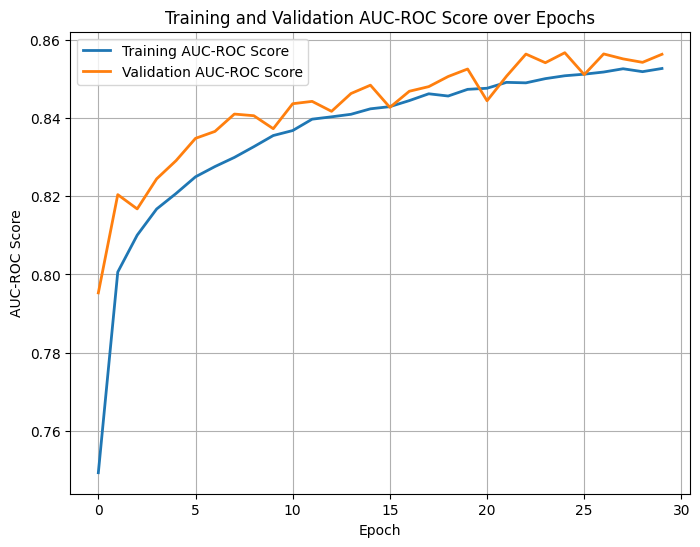

In [110]:
plt.figure(figsize=(8, 6))
plt.plot(epoch_stats['auc'], label='Training AUC-ROC Score', linewidth=2)
plt.plot(epoch_stats['val_auc'], label='Validation AUC-ROC Score', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('AUC-ROC Score')
plt.title('Training and Validation AUC-ROC Score over Epochs')
plt.grid(True) 
plt.legend()
plt.show()

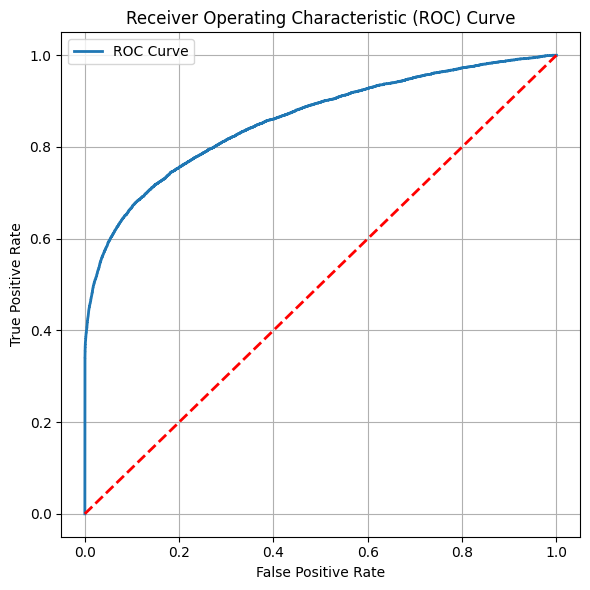

In [111]:
# Plot ROC curve
plt.figure(figsize=(6, 6))
fpr, tpr, thresholds = roc_curve(results_df['True Labels'], results_df['Predictions'])
plt.plot(fpr, tpr, label='ROC Curve', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.grid(True) 
plt.legend()
plt.tight_layout()

<Figure size 600x600 with 0 Axes>

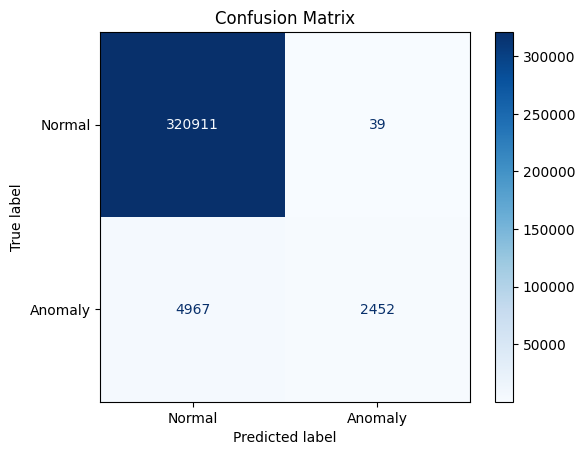

In [112]:
true_labels = results_df['True Labels']
predictions = results_df['Predictions']

threshold = 0.5  # Threshold for classification
binary_predictions = (predictions > threshold).astype(int)
cm = confusion_matrix(true_labels, binary_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])
plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()